<a href="https://colab.research.google.com/github/NathanLCR/natural-language-letras/blob/master/WordCloudCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -*- coding: UTF-8 -*
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
import csv
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
nltk.download('punkt')
nltk.download('stopwords')
#Abrindo o corpus, e iterando ele.
corpus = ''
with open('Corpus.csv', 'r') as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        for line in row:
            corpus += line.replace('"',' ').replace("'"," ").lower() + " "

In [0]:
stopwords_list = ['muitos','onde','havia','dos','mas','dia','veio','disse','que','ficou','houve','era','uns','quem','qual','uns','pra','...']

In [0]:
#Filtrando o conteudo do corpus.
corpus_tokenized = word_tokenize(corpus)
#Criando a lista de stopwords com os stopwords do nltk, pontuações, e uma lista customizada com stopwords proprias.
stop_words = set(stopwords.words('portuguese') + list(punctuation)+list(stopwords_list))
corpus_tokenized_filtered = [token for token in corpus_tokenized if token not in stop_words and len(token)>2]
stringWordCloud = ""
for token in corpus_tokenized_filtered:
  stringWordCloud += token + " "

In [0]:
#Aplicando o contador de frequencia do nltk
from nltk.probability import FreqDist
tokens_frequency = FreqDist(corpus_tokenized_filtered)
tokens_frequency = dict(top_tokens)

In [0]:
#Ordenando o dicionario
top_tokens_dict = sorted(top_tokens, key=top_tokens.get, reverse=True)


In [0]:
#Selecionando as 10 palavras que mais aparecem
top_10 = dict()
for t in top_tokens_dict[:10]:
  top_10[t] = tokens_frequency[t]

In [0]:
#Transformando em lista as chaves e valores
tokens = [ k for k in dicionario ]
frequency = [ v for v in dicionario.values() ]


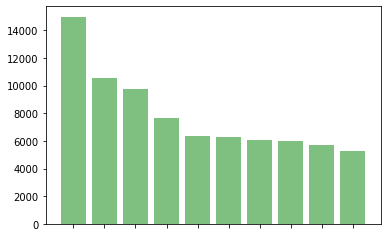

In [0]:
#Criando o grafico
fig = plt.figure()
y_pos = np.arange(len(tokens))
plt.bar(y_pos,frequency,align='center', alpha=0.5,color='g')
plt.xticks(y_pos, tokens, color='#FFF')
plt.show()

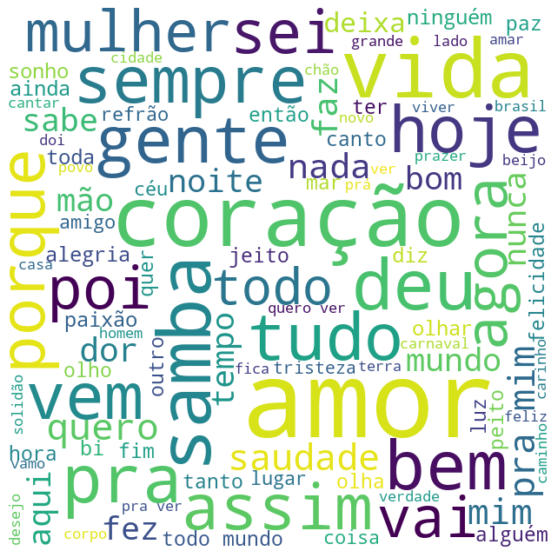

In [0]:
guitar_mask = np.array(Image.open("semfundo.png"))

#Criando a wordcloud
wc = WordCloud(background_color="white", max_words=100, mask=guitar_mask,
               contour_width=3, contour_color='firebrick')
wc.generate(stringWordCloud)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()